# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; me:(it's the workaround for when you have to use a loop)
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

Me: for arrays the operations are element-wise; i.e. for the sum, you sum each element with the correspondent element. 
In the series, it's element wise **but matching the labels/indexes** !!!
If I sum two series, the element with index "a" will be summed with the element(s) with index "a". **If there's none, it returns NaN (Not a Number)**

A key difference between Series and ndarray is that operations between **Series automatically align the data based on label**. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.437767
b    0.040033
c   -0.350483
d    0.926172
e    0.356196
dtype: float64
a         NaN
b    0.080066
c   -0.700966
d    1.852343
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [8]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2023,11,22,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2023'
# or alternatively
date = '22/11/2023 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D') # me: freq='D' means frequency of days, so that range is a period of 7 days from date
print (days)

seconds = pd.date_range(date, periods=3600, freq='s') # frequency of seconds
print (seconds)


2023-11-22
2023-11-22 10:45:10.000015
22/11/2023 10:45:00
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-23 10:45:00',
               '2023-11-24 10:45:00', '2023-11-25 10:45:00',
               '2023-11-26 10:45:00', '2023-11-27 10:45:00',
               '2023-11-28 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 10:45:01',
               '2023-11-22 10:45:02', '2023-11-22 10:45:03',
               '2023-11-22 10:45:04', '2023-11-22 10:45:05',
               '2023-11-22 10:45:06', '2023-11-22 10:45:07',
               '2023-11-22 10:45:08', '2023-11-22 10:45:09',
               ...
               '2023-11-22 11:44:50', '2023-11-22 11:44:51',
               '2023-11-22 11:44:52', '2023-11-22 11:44:53',
               '2023-11-22 11:44:54', '2023-11-22 11:44:55',
               '2023-11-22 11:44:56', '2023-11-22 11:44:57',
               '2023-11-22 11:44:58', '2023-11-22 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 
Me: timestamp is a counter that is counting since 01/01/1970

In [9]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [10]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2023-11-22':'2023-11-28'], '\n') # Note - includes end time


2023-11-22 10:45:00    10.215384
2023-11-23 10:45:00    11.053333
2023-11-24 10:45:00     8.740741
2023-11-25 10:45:00     7.531167
Freq: D, dtype: float64 

2023-11-22 10:45:00    10.215384
2023-11-23 10:45:00    11.053333
2023-11-24 10:45:00     8.740741
2023-11-25 10:45:00     7.531167
2023-11-26 10:45:00    10.328436
2023-11-27 10:45:00    10.634357
2023-11-28 10:45:00    10.023438
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [11]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [13]:
entries=10
dates=pd.date_range('11/22/2023 10:45:00',freq='h', periods=entries) # hourly frequence
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2023-11-22 10:45:00,-1.495450,0.313181,-0.868887,0.689713
2023-11-22 11:45:00,0.538153,-0.470086,0.644516,0.847273
2023-11-22 12:45:00,0.094143,0.298099,1.752395,1.278784
2023-11-22 13:45:00,1.221730,0.955927,-0.840351,0.888268
2023-11-22 14:45:00,-0.129499,1.859466,0.181787,-1.546546
2023-11-22 15:45:00,-0.719877,-0.487301,0.306909,1.166879
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,0.901323
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,1.012620
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,0.393861
2023-11-22 19:45:00,1.081149,0.171713,0.242655,1.614811


or by means of a dictionary:


In [18]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts  
# Me: it returns an error "All arrays must have the same length"

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [16]:
df.head(2) # me: only the first two elements

,A,B,C,D
2023-11-22 10:45:00,-1.495450,0.313181,-0.868887,0.689713
2023-11-22 11:45:00,0.538153,-0.470086,0.644516,0.847273


In [19]:
df.tail(4) # me: only the last four elements

,A,B,C,D
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,0.901323
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,1.012620
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,0.393861
2023-11-22 19:45:00,1.081149,0.171713,0.242655,1.614811


In [20]:
df.index

DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 11:45:00',
               '2023-11-22 12:45:00', '2023-11-22 13:45:00',
               '2023-11-22 14:45:00', '2023-11-22 15:45:00',
               '2023-11-22 16:45:00', '2023-11-22 17:45:00',
               '2023-11-22 18:45:00', '2023-11-22 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
df.values

array([[-1.49545011,  0.31318094, -0.86888679,  0.68971344],
       [ 0.53815252, -0.47008579,  0.64451605,  0.847273  ],
       [ 0.09414266,  0.2980989 ,  1.7523952 ,  1.2787838 ],
       [ 1.22172966,  0.95592725, -0.84035057,  0.88826791],
       [-0.12949859,  1.85946619,  0.18178698, -1.54654603],
       [-0.71987714, -0.48730135,  0.30690927,  1.16687935],
       [-0.11248249,  1.40515116, -0.73036219,  0.90132309],
       [ 0.25405214,  0.44161128, -0.6974076 ,  1.01262023],
       [ 1.20200517,  2.26417376, -0.76733516,  0.39386139],
       [ 1.08114858,  0.17171271,  0.24265492,  1.61481108]])

In [23]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.193392,0.675194,-0.077608,0.724699
std,0.874284,0.929957,0.861649,0.864095
min,-1.495450,-0.487301,-0.868887,-1.546546
25%,-0.125245,0.203309,-0.758092,0.729103
50%,0.174097,0.377396,-0.257810,0.894795
75%,0.945400,1.292845,0.290846,1.128315
max,1.221730,2.264174,1.752395,1.614811


In [24]:
df.T # me: you take the transpose. It's not so common to use

,2023-11-22 10:45:00,2023-11-22 11:45:00,2023-11-22 12:45:00,2023-11-22 13:45:00,2023-11-22 14:45:00,2023-11-22 15:45:00,2023-11-22 16:45:00,2023-11-22 17:45:00,2023-11-22 18:45:00,2023-11-22 19:45:00
A,-1.495450,0.538153,0.094143,1.221730,-0.129499,-0.719877,-0.112482,0.254052,1.202005,1.081149
B,0.313181,-0.470086,0.298099,0.955927,1.859466,-0.487301,1.405151,0.441611,2.264174,0.171713
C,-0.868887,0.644516,1.752395,-0.840351,0.181787,0.306909,-0.730362,-0.697408,-0.767335,0.242655
D,0.689713,0.847273,1.278784,0.888268,-1.546546,1.166879,0.901323,1.012620,0.393861,1.614811


In [27]:
df.sort_index(axis=0,ascending=False) # me: so descending

,A,B,C,D
2023-11-22 19:45:00,1.081149,0.171713,0.242655,1.614811
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,0.393861
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,1.012620
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,0.901323
2023-11-22 15:45:00,-0.719877,-0.487301,0.306909,1.166879
2023-11-22 14:45:00,-0.129499,1.859466,0.181787,-1.546546
2023-11-22 13:45:00,1.221730,0.955927,-0.840351,0.888268
2023-11-22 12:45:00,0.094143,0.298099,1.752395,1.278784
2023-11-22 11:45:00,0.538153,-0.470086,0.644516,0.847273
2023-11-22 10:45:00,-1.495450,0.313181,-0.868887,0.689713


In [28]:
df.sort_values(by="C") # me: you sort everything by the values of C. We do not scramble lines. We move C and the corresponding line

,A,B,C,D
2023-11-22 10:45:00,-1.495450,0.313181,-0.868887,0.689713
2023-11-22 13:45:00,1.221730,0.955927,-0.840351,0.888268
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,0.393861
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,0.901323
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,1.012620
2023-11-22 14:45:00,-0.129499,1.859466,0.181787,-1.546546
2023-11-22 19:45:00,1.081149,0.171713,0.242655,1.614811
2023-11-22 15:45:00,-0.719877,-0.487301,0.306909,1.166879
2023-11-22 11:45:00,0.538153,-0.470086,0.644516,0.847273
2023-11-22 12:45:00,0.094143,0.298099,1.752395,1.278784


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [29]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A) ## me: it's defined since there's an index 'A'

2023-11-22 10:45:00   -1.495450
2023-11-22 11:45:00    0.538153
2023-11-22 12:45:00    0.094143
2023-11-22 13:45:00    1.221730
2023-11-22 14:45:00   -0.129499
2023-11-22 15:45:00   -0.719877
2023-11-22 16:45:00   -0.112482
2023-11-22 17:45:00    0.254052
2023-11-22 18:45:00    1.202005
2023-11-22 19:45:00    1.081149
Freq: H, Name: A, dtype: float64 

2023-11-22 10:45:00   -1.495450
2023-11-22 11:45:00    0.538153
2023-11-22 12:45:00    0.094143
2023-11-22 13:45:00    1.221730
2023-11-22 14:45:00   -0.129499
2023-11-22 15:45:00   -0.719877
2023-11-22 16:45:00   -0.112482
2023-11-22 17:45:00    0.254052
2023-11-22 18:45:00    1.202005
2023-11-22 19:45:00    1.081149
Freq: H, Name: A, dtype: float64


In [30]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2023-11-22 10:45:00":"2023-11-22 12:45:00"])

                            A         B         C         D
2023-11-22 10:45:00 -1.495450  0.313181 -0.868887  0.689713
2023-11-22 11:45:00  0.538153 -0.470086  0.644516  0.847273
2023-11-22 12:45:00  0.094143  0.298099  1.752395  1.278784
                            A         B         C         D
2023-11-22 10:45:00 -1.495450  0.313181 -0.868887  0.689713
2023-11-22 11:45:00  0.538153 -0.470086  0.644516  0.847273
2023-11-22 12:45:00  0.094143  0.298099  1.752395  1.278784


### Selection by label

In [31]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -1.495450
B    0.313181
C   -0.868887
D    0.689713
Name: 2023-11-22 10:45:00, dtype: float64

In [32]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2023-11-22 10:45:00,-1.495450,0.313181
2023-11-22 11:45:00,0.538153,-0.470086
2023-11-22 12:45:00,0.094143,0.298099
2023-11-22 13:45:00,1.221730,0.955927
2023-11-22 14:45:00,-0.129499,1.859466
2023-11-22 15:45:00,-0.719877,-0.487301
2023-11-22 16:45:00,-0.112482,1.405151
2023-11-22 17:45:00,0.254052,0.441611
2023-11-22 18:45:00,1.202005,2.264174
2023-11-22 19:45:00,1.081149,0.171713


In [33]:
# showing label slicing, both endpoints are included:
df.loc['2023-11-22 14:45:00':'2023-11-22 16:45:00',['A','B']]

,A,B
2023-11-22 14:45:00,-0.129499,1.859466
2023-11-22 15:45:00,-0.719877,-0.487301
2023-11-22 16:45:00,-0.112482,1.405151


In [34]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.5381525179372212
0.5381525179372212


### Selecting by position

In [35]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    1.221730
B    0.955927
C   -0.840351
D    0.888268
Name: 2023-11-22 13:45:00, dtype: float64 

                            A         B
2023-11-22 13:45:00  1.221730  0.955927
2023-11-22 14:45:00 -0.129499  1.859466


In [36]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2023-11-22 11:45:00,0.538153,0.644516
2023-11-22 12:45:00,0.094143,1.752395
2023-11-22 14:45:00,-0.129499,0.181787


In [37]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2023-11-22 11:45:00  0.538153 -0.470086  0.644516  0.847273
2023-11-22 12:45:00  0.094143  0.298099  1.752395  1.278784 

                            B         C
2023-11-22 10:45:00  0.313181 -0.868887
2023-11-22 11:45:00 -0.470086  0.644516
2023-11-22 12:45:00  0.298099  1.752395
2023-11-22 13:45:00  0.955927 -0.840351
2023-11-22 14:45:00  1.859466  0.181787
2023-11-22 15:45:00 -0.487301  0.306909
2023-11-22 16:45:00  1.405151 -0.730362
2023-11-22 17:45:00  0.441611 -0.697408
2023-11-22 18:45:00  2.264174 -0.767335
2023-11-22 19:45:00  0.171713  0.242655


In [38]:
# selecting an individual element by position
df.iloc[1,1]
#df.iat[1,1]


-0.47008578613827184

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [39]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2023-11-22 10:45:00,-1.495450,0.313181,-0.868887,0.689713
2023-11-22 12:45:00,0.094143,0.298099,1.752395,1.278784
2023-11-22 13:45:00,1.221730,0.955927,-0.840351,0.888268
2023-11-22 14:45:00,-0.129499,1.859466,0.181787,-1.546546
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,0.901323
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,1.012620
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,0.393861
2023-11-22 19:45:00,1.081149,0.171713,0.242655,1.614811


In [40]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2023-11-22 10:45:00,NaN,0.313181,NaN,0.689713
2023-11-22 11:45:00,0.538153,NaN,0.644516,0.847273
2023-11-22 12:45:00,0.094143,0.298099,1.752395,1.278784
2023-11-22 13:45:00,1.221730,0.955927,NaN,0.888268
2023-11-22 14:45:00,NaN,1.859466,0.181787,NaN
2023-11-22 15:45:00,NaN,NaN,0.306909,1.166879
2023-11-22 16:45:00,NaN,1.405151,NaN,0.901323
2023-11-22 17:45:00,0.254052,0.441611,NaN,1.012620
2023-11-22 18:45:00,1.202005,2.264174,NaN,0.393861
2023-11-22 19:45:00,1.081149,0.171713,0.242655,1.614811


### Setting

Combination of selection and setting of values

In [42]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [43]:
df

,A,B,C,D,E,E prime
2023-11-22 10:45:00,0.000000,0.313181,-0.868887,5.0,0.0,0
2023-11-22 11:45:00,0.538153,-0.470086,0.644516,5.0,0.5,2
2023-11-22 12:45:00,0.094143,0.298099,1.752395,5.0,1.0,4
2023-11-22 13:45:00,1.221730,0.955927,-0.840351,5.0,1.5,6
2023-11-22 14:45:00,-0.129499,1.859466,0.181787,5.0,2.0,8
2023-11-22 15:45:00,-0.719877,-0.487301,0.306909,5.0,2.5,10
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,5.0,3.0,12
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,5.0,3.5,14
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,5.0,4.0,16
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,18


In [44]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index) # me: with this you do the cosine of "E". 
df
## me: It's important to keep pristine the original dataset, so you define a new column with the cosine of E, you don't redefine E

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.313181,-0.868887,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.538153,-0.470086,0.644516,5.0,0.5,2,0.999962
2023-11-22 12:45:00,0.094143,0.298099,1.752395,5.0,1.0,4,0.999848
2023-11-22 13:45:00,1.221730,0.955927,-0.840351,5.0,1.5,6,0.999657
2023-11-22 14:45:00,-0.129499,1.859466,0.181787,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.719877,-0.487301,0.306909,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,5.0,3.5,14,0.998135
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,5.0,4.0,16,0.997564
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,18,0.996917


In [45]:
# another example of global setting
df2=df.copy() ## me: with this, if i modify df2, df stays untouched, and viceversa. 

df2[df2>0] = -df2 ## Me: actualyy you shouldn't do that bc your redefining a part of the og dataset. Ypu should add a column
df2

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.313181,-0.868887,-5.0,0.0,0,-1.000000
2023-11-22 11:45:00,-0.538153,-0.470086,-0.644516,-5.0,-0.5,-2,-0.999962
2023-11-22 12:45:00,-0.094143,-0.298099,-1.752395,-5.0,-1.0,-4,-0.999848
2023-11-22 13:45:00,-1.221730,-0.955927,-0.840351,-5.0,-1.5,-6,-0.999657
2023-11-22 14:45:00,-0.129499,-1.859466,-0.181787,-5.0,-2.0,-8,-0.999391
2023-11-22 15:45:00,-0.719877,-0.487301,-0.306909,-5.0,-2.5,-10,-0.999048
2023-11-22 16:45:00,-0.112482,-1.405151,-0.730362,-5.0,-3.0,-12,-0.998630
2023-11-22 17:45:00,-0.254052,-0.441611,-0.697408,-5.0,-3.5,-14,-0.998135
2023-11-22 18:45:00,-1.202005,-2.264174,-0.767335,-5.0,-4.0,-16,-0.997564
2023-11-22 19:45:00,-1.081149,-0.171713,-0.242655,-5.0,-4.5,-18,-0.996917


In [46]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.313181,-0.868887,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.538153,-0.470086,0.644516,5.0,0.5,2,0.999962
2023-11-22 12:45:00,0.094143,0.298099,1.752395,5.0,1.0,4,0.999848
2023-11-22 13:45:00,1.221730,0.955927,-0.840351,5.0,1.5,6,0.999657
2023-11-22 14:45:00,-0.129499,1.859466,0.181787,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.719877,-0.487301,0.306909,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,5.0,3.5,14,0.998135
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,5.0,4.0,16,0.997564
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [47]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2023-11-22 10:45:00,0.000000,0.313181,-0.868887,5.0,0.0,1.000000
2023-11-22 11:45:00,0.538153,-0.470086,0.644516,5.0,0.5,0.999962
2023-11-22 12:45:00,0.094143,0.298099,1.752395,5.0,1.0,0.999848
2023-11-22 13:45:00,1.221730,0.955927,-0.840351,5.0,1.5,0.999657
2023-11-22 14:45:00,-0.129499,1.859466,0.181787,5.0,2.0,0.999391
2023-11-22 15:45:00,-0.719877,-0.487301,0.306909,5.0,2.5,0.999048
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,5.0,3.0,0.998630
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,5.0,3.5,0.998135
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,5.0,4.0,0.997564
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,0.996917


In [48]:
# Dropping by rows
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.313181,-0.868887,5.0,0.0,0,1.000000
2023-11-22 15:45:00,-0.719877,-0.487301,0.306909,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,5.0,3.5,14,0.998135
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,5.0,4.0,16,0.997564
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,18,0.996917


In [49]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.313181,-0.868887,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.538153,-0.470086,0.644516,5.0,0.5,2,0.999962
2023-11-22 12:45:00,0.094143,0.298099,1.752395,5.0,1.0,4,0.999848
2023-11-22 13:45:00,1.221730,0.955927,-0.840351,5.0,1.5,6,0.999657
2023-11-22 14:45:00,-0.129499,1.859466,0.181787,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.719877,-0.487301,0.306909,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,5.0,3.5,14,0.998135
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,5.0,4.0,16,0.997564
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,18,0.996917


In [50]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2023-11-22 18:45:00"))

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.313181,-0.868887,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.538153,-0.470086,0.644516,5.0,0.5,2,0.999962
2023-11-22 12:45:00,0.094143,0.298099,1.752395,5.0,1.0,4,0.999848
2023-11-22 13:45:00,1.221730,0.955927,-0.840351,5.0,1.5,6,0.999657
2023-11-22 14:45:00,-0.129499,1.859466,0.181787,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.719877,-0.487301,0.306909,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,5.0,3.5,14,0.998135
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [51]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,0.313181,NaN,5.0,NaN,NaN,1.000000
2023-11-22 11:45:00,0.538153,NaN,0.644516,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,0.094143,0.298099,1.752395,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,1.221730,0.955927,NaN,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,NaN,1.859466,0.181787,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,NaN,NaN,0.306909,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,NaN,1.405151,NaN,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,0.254052,0.441611,NaN,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,1.202005,2.264174,NaN,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,18.0,0.996917


In [52]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2023-11-22 12:45:00,0.094143,0.298099,1.752395,5.0,1.0,4.0,0.999848
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,18.0,0.996917


In [53]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,True,False,True,False,True,True,False
2023-11-22 11:45:00,False,True,False,False,False,False,False
2023-11-22 12:45:00,False,False,False,False,False,False,False
2023-11-22 13:45:00,False,False,True,False,False,False,False
2023-11-22 14:45:00,True,False,False,False,False,False,False
2023-11-22 15:45:00,True,True,False,False,False,False,False
2023-11-22 16:45:00,True,False,True,False,False,False,False
2023-11-22 17:45:00,False,False,True,False,False,False,False
2023-11-22 18:45:00,False,False,True,False,False,False,False
2023-11-22 19:45:00,False,False,False,False,False,False,False


In [54]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.313181,0.000000,5.0,0.0,0.0,1.000000
2023-11-22 11:45:00,0.538153,0.000000,0.644516,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,0.094143,0.298099,1.752395,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,1.221730,0.955927,0.000000,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,0.000000,1.859466,0.181787,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,0.000000,0.000000,0.306909,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,0.000000,1.405151,0.000000,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,0.254052,0.441611,0.000000,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,1.202005,2.264174,0.000000,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [55]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,0.313181,NaN,5.0,NaN,NaN,1.000000
2023-11-22 11:45:00,0.538153,0.313181,0.644516,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,0.094143,0.298099,1.752395,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,1.221730,0.955927,1.752395,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,1.221730,1.859466,0.181787,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,1.221730,1.859466,0.306909,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,1.221730,1.405151,0.306909,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,0.254052,0.441611,0.306909,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,1.202005,2.264174,0.306909,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [56]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.342937
B          0.675194
C         -0.077608
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2023-11-22 10:45:00    0.777756
2023-11-22 11:45:00    1.316078
2023-11-22 12:45:00    1.877783
2023-11-22 13:45:00    2.119566
2023-11-22 14:45:00    2.558735
2023-11-22 15:45:00    2.514111
2023-11-22 16:45:00    3.080134
2023-11-22 17:45:00    3.356627
2023-11-22 18:45:00    4.099487
2023-11-22 19:45:00    4.284633
Freq: H, dtype: float64 



In [57]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.313181,-0.868887,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.538153,-0.156905,-0.224371,10.0,0.5,2,1.999962
2023-11-22 12:45:00,0.632295,0.141194,1.528024,15.0,1.5,6,2.999810
2023-11-22 13:45:00,1.854025,1.097121,0.687674,20.0,3.0,12,3.999467
2023-11-22 14:45:00,1.724526,2.956587,0.869461,25.0,5.0,20,4.998858
2023-11-22 15:45:00,1.004649,2.469286,1.176370,30.0,7.5,30,5.997906
2023-11-22 16:45:00,0.892167,3.874437,0.446008,35.0,10.5,42,6.996536
2023-11-22 17:45:00,1.146219,4.316049,-0.251400,40.0,14.0,56,7.994670
2023-11-22 18:45:00,2.348224,6.580222,-1.018735,45.0,18.0,72,8.992234
2023-11-22 19:45:00,3.429372,6.751935,-0.776080,50.0,22.5,90,9.989152


In [58]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.313181,-0.868887,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.538153,-0.470086,0.644516,5.0,0.5,2,0.999962
2023-11-22 12:45:00,0.094143,0.298099,1.752395,5.0,1.0,4,0.999848
2023-11-22 13:45:00,1.221730,0.955927,-0.840351,5.0,1.5,6,0.999657
2023-11-22 14:45:00,-0.129499,1.859466,0.181787,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.719877,-0.487301,0.306909,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.112482,1.405151,-0.730362,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.254052,0.441611,-0.697408,5.0,3.5,14,0.998135
2023-11-22 18:45:00,1.202005,2.264174,-0.767335,5.0,4.0,16,0.997564
2023-11-22 19:45:00,1.081149,0.171713,0.242655,5.0,4.5,18,0.996917


In [59]:
df.apply(lambda x: x.max() - x.min())

A           1.941607
B           2.751475
C           2.621282
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [60]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2023-11-22 10:45:00    0.313181
2023-11-22 11:45:00    0.068067
2023-11-22 12:45:00    0.392242
2023-11-22 13:45:00    2.177657
2023-11-22 14:45:00    1.729968
2023-11-22 15:45:00   -1.207178
2023-11-22 16:45:00    1.292669
2023-11-22 17:45:00    0.695663
2023-11-22 18:45:00    3.466179
2023-11-22 19:45:00    1.252861
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [61]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [62]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25 ##  Me: this is wayyy faster than the loop which can be seen below

In [63]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [64]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [65]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.710765,0.250750,0.557607,1.940569
1,0.791738,-1.479379,1.736695,0.904867
2,-1.305937,-0.358690,0.933831,0.573727
3,-0.505228,0.366711,1.172025,0.092370
4,1.053148,-0.625980,-0.253084,-0.934984
5,0.698568,2.324042,-0.589314,-0.469485
6,-0.302224,0.008735,-0.136113,-0.385757
7,-1.481257,-0.192114,1.415515,2.883193
8,0.218312,0.596082,-0.965443,0.542286
9,2.174844,-1.971975,-1.962153,0.424836


In [66]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.710765  0.250750  0.557607  1.940569
 1  0.791738 -1.479379  1.736695  0.904867
 2 -1.305937 -0.358690  0.933831  0.573727,
           0         1         2         3
 3 -0.505228  0.366711  1.172025  0.092370
 4  1.053148 -0.625980 -0.253084 -0.934984
 5  0.698568  2.324042 -0.589314 -0.469485
 6 -0.302224  0.008735 -0.136113 -0.385757,
           0         1         2         3
 7 -1.481257 -0.192114  1.415515  2.883193
 8  0.218312  0.596082 -0.965443  0.542286
 9  2.174844 -1.971975 -1.962153  0.424836]

In [67]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.710765,0.250750,0.557607,1.940569
1,0.791738,-1.479379,1.736695,0.904867
2,-1.305937,-0.358690,0.933831,0.573727
3,-0.505228,0.366711,1.172025,0.092370
4,1.053148,-0.625980,-0.253084,-0.934984
5,0.698568,2.324042,-0.589314,-0.469485
6,-0.302224,0.008735,-0.136113,-0.385757
7,-1.481257,-0.192114,1.415515,2.883193
8,0.218312,0.596082,-0.965443,0.542286
9,2.174844,-1.971975,-1.962153,0.424836


In [68]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,0.710765,0.250750,0.557607,1.940569
1,0.791738,-1.479379,1.736695,0.904867
2,-1.305937,-0.358690,0.933831,0.573727
3,-0.505228,0.366711,1.172025,0.092370
4,1.053148,-0.625980,-0.253084,-0.934984
5,0.698568,2.324042,-0.589314,-0.469485
6,-0.302224,0.008735,-0.136113,-0.385757
7,-1.481257,-0.192114,1.415515,2.883193
8,0.218312,0.596082,-0.965443,0.542286
9,2.174844,-1.971975,-1.962153,0.424836


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [69]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

In [70]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.389240,-0.920374
1,bar,one,0.003190,-0.131312
2,foo,two,-1.047821,0.504579
3,bar,three,-0.583569,-0.443758
4,foo,two,0.527248,-1.316969
5,bar,two,-0.140903,1.062827
6,foo,one,0.742317,1.808772
7,foo,three,0.165582,-1.049838


In [71]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-0.721282,0.487756
foo,onetwotwoonethree,-0.001915,-0.973830


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [72]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.710096
       two       0.225688
baz    one       1.100228
       two       0.443656
foo    one      -0.148781
       two       1.460660
qux    one       1.235506
       two       0.590041
dtype: float64


In [73]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.003190 -0.131312
    three -0.583569 -0.443758
    two   -0.140903  1.062827
foo one    0.353076  0.888398
    three  0.165582 -1.049838
    two   -0.520573 -0.812390

In [74]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.003190
            D   -0.131312
     three  C   -0.583569
            D   -0.443758
     two    C   -0.140903
            D    1.062827
foo  one    C    0.353076
            D    0.888398
     three  C    0.165582
            D   -1.049838
     two    C   -0.520573
            D   -0.812390
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

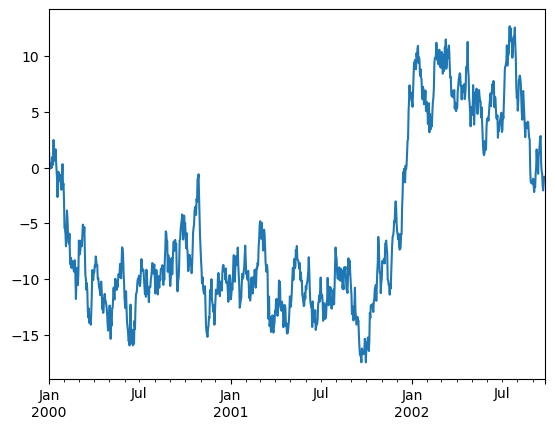

In [75]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

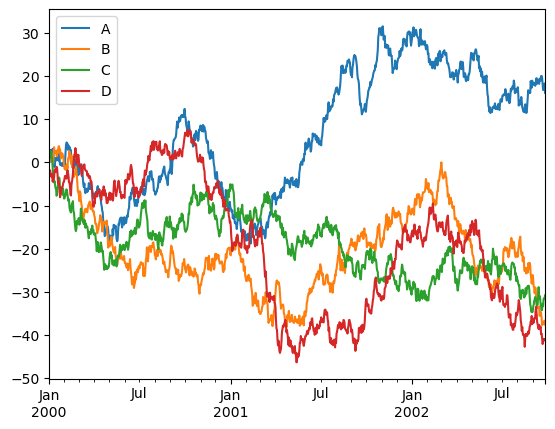

In [76]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')